## C: Regularization Parameter
Intuition:

C determines the trade-off between achieving a wide margin and ensuring that most of the training data is classified correctly.
#### A smaller value of C creates a wider margin, which might misclassify more data points (higher bias, lower variance).

#### A larger value of C aims to classify all training examples correctly by selecting a smaller margin (lower bias, higher variance).

In [1]:
def plot_decision_function(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    return ax


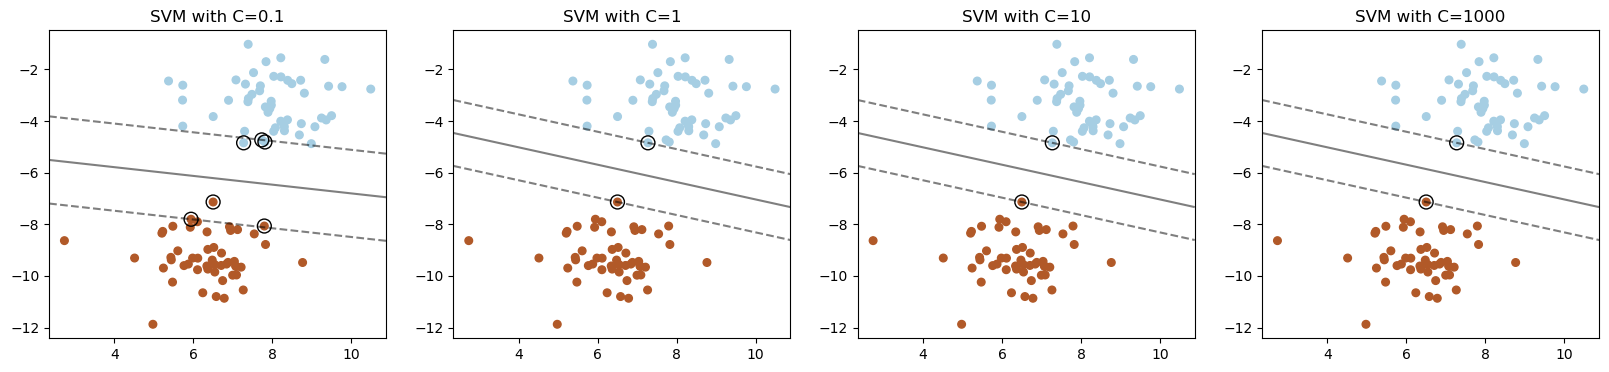

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Create a simple dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Train SVMs with different C values
C_values = [0.1, 1, 10, 1000]
models = [SVC(kernel='linear', C=C).fit(X, y) for C in C_values]

# Plot the decision boundaries for each model
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for model, ax, C in zip(models, axes, C_values):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    # plot the decision function
    ax = plot_decision_function(model, ax)
    
    ax.set_title(f'SVM with C={C}')

plt.show()


## gamma: RBF Kernel Coefficient
For RBF Kernel:
gamma defines how far the influence of a single training example reaches.
Low values mean far reach, and high values mean close reach.
A small gamma will produce a more flexible decision boundary, whereas a large gamma will produce a more rigid boundary (can lead to overfitting).

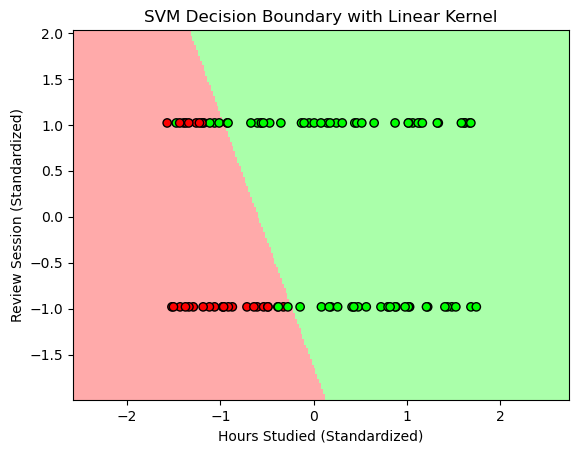

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


data = pd.read_csv('student_data.csv')
# Create DataFrame
df = pd.DataFrame(data)

# Assuming X contains the features and y contains the target variable
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fitting the Support Vector Machine model with a linear kernel
svm_model_linear = SVC(kernel='linear')
svm_model_linear.fit(X, y)

# Create a meshgrid of points
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. Assign a color to each point in the mesh
Z = svm_model_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00']))
plt.xlabel('Hours Studied (Standardized)')
plt.ylabel('Review Session (Standardized)')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.show()


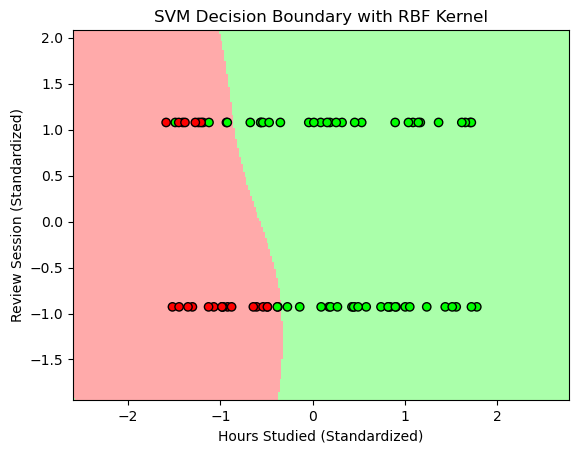

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
data = pd.read_csv('student_data.csv')
# Create DataFrame
df = pd.DataFrame(data)

# Assuming X contains the features and y contains the target variable
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Splitting the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Fitting the Support Vector Machine model with an RBF kernel
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(X_train, y_train)

# Create a meshgrid of points
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. Assign a color to each point in the mesh
Z = svm_model_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00']))
plt.xlabel('Hours Studied (Standardized)')
plt.ylabel('Review Session (Standardized)')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.show()


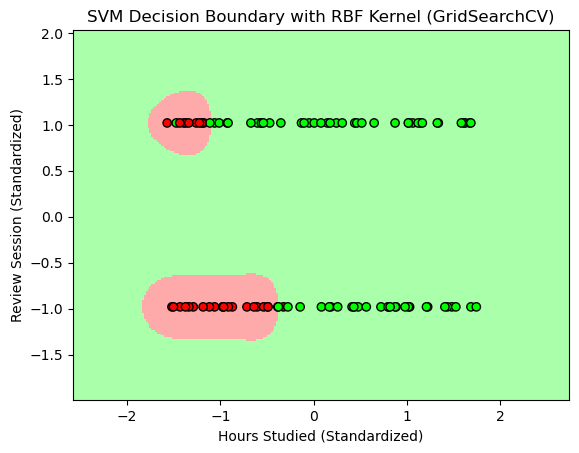

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
data = pd.read_csv('student_data.csv')
# Create DataFrame
df = pd.DataFrame(data)
# Assuming X contains the features and y contains the target variable
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Set the parameters for the grid search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}

# Create a stratified 5-fold cross-validation object
cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation using stratified sampling
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=cv_strat)
grid_search.fit(X, y)

# Get the best parameters
best_gamma = grid_search.best_params_['gamma']

# Fitting the Support Vector Machine model with the best gamma
svm_model_rbf = SVC(kernel='rbf', gamma=best_gamma)
svm_model_rbf.fit(X, y)

# Create a meshgrid of points
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. Assign a color to each point in the mesh
Z = svm_model_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00']))
plt.xlabel('Hours Studied (Standardized)')
plt.ylabel('Review Session (Standardized)')
plt.title('SVM Decision Boundary with RBF Kernel (GridSearchCV)')
plt.show()



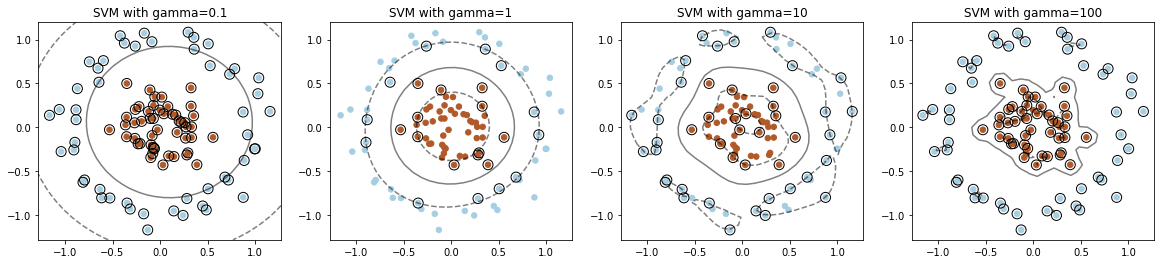

In [14]:
# Generate moon shaped data
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Generate donut shaped data
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)


gamma_values = [0.1, 1, 10, 100]
models = [SVC(kernel='rbf', gamma=gamma).fit(X, y) for gamma in gamma_values]

# Plot the decision boundaries for each model
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for model, ax, gamma in zip(models, axes, gamma_values):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    # plot the decision function
    ax = plot_decision_function(model, ax)
    
    ax.set_title(f'SVM with gamma={gamma}')

plt.show()
